In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os, sys
!pip install lux
!pip install xgboost
import lux
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df=pd.read_csv('Parkinsson disease.csv')
df.head(n=10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [6]:
df.shape

(195, 24)

In [7]:
df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [8]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [9]:
for i in df.columns:
    print("*********",i,"***********")
    print()
    print(set(df["PPE"].tolist()))
    print()


********* name ***********

{0.377429, 0.316395, 0.3167, 0.259765, 0.095032, 0.105993, 0.108514, 0.085569, 0.093534, 0.365391, 0.301952, 0.277227, 0.214346, 0.164916, 0.183572, 0.056141, 0.270173, 0.220546, 0.216638, 0.170633, 0.103224, 0.113942, 0.209863, 0.112878, 0.115515, 0.378483, 0.220657, 0.19273, 0.086398, 0.119308, 0.231571, 0.138512, 0.199889, 0.141929, 0.242119, 0.160809, 0.229892, 0.24308, 0.244948, 0.169923, 0.215724, 0.121777, 0.231723, 0.09632, 0.102706, 0.11513, 0.13639, 0.277948, 0.251972, 0.093193, 0.160376, 0.174152, 0.214075, 0.165827, 0.274407, 0.284654, 0.368674, 0.357775, 0.275931, 0.228624, 0.234589, 0.430788, 0.09147, 0.098555, 0.147403, 0.180828, 0.327978, 0.160812, 0.05761, 0.09622, 0.185668, 0.209191, 0.247455, 0.212386, 0.268144, 0.370961, 0.454721, 0.1701, 0.068501, 0.160691, 0.225461, 0.186489, 0.215558, 0.222716, 0.196535, 0.228319, 0.340623, 0.179677, 0.28278, 0.418646, 0.131728, 0.367233, 0.144105, 0.073581, 0.091546, 0.105306, 0.141422, 0.132703, 0.21

Axes(0.125,0.11;0.775x0.77)


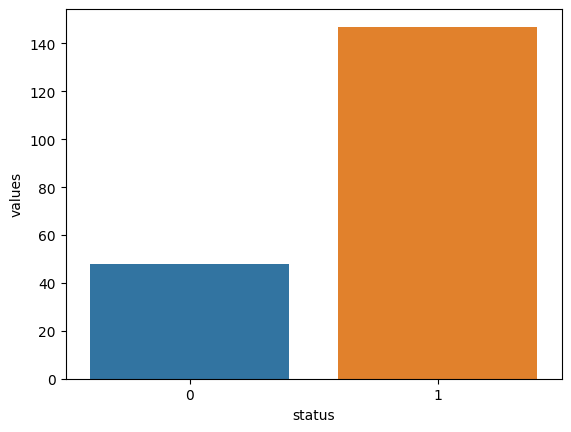

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

temp=df["status"].value_counts()
temp_df=pd.DataFrame({'status':temp.index,'values':temp.values})
print(sns.barplot(x='status',y="values",data=temp_df))

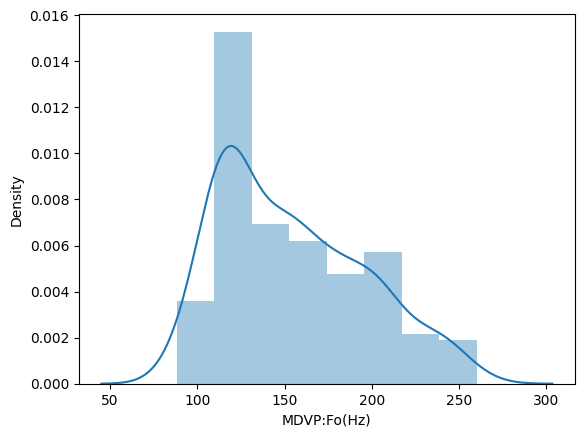

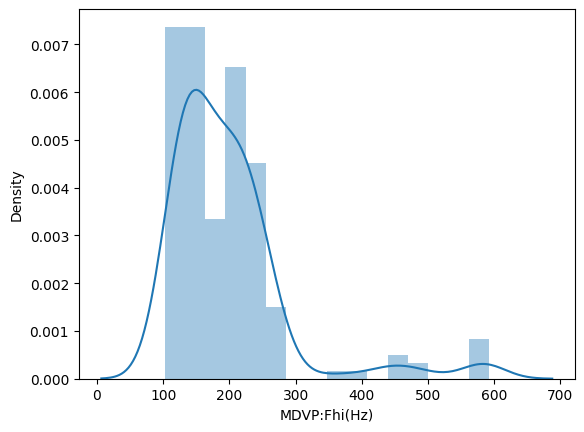

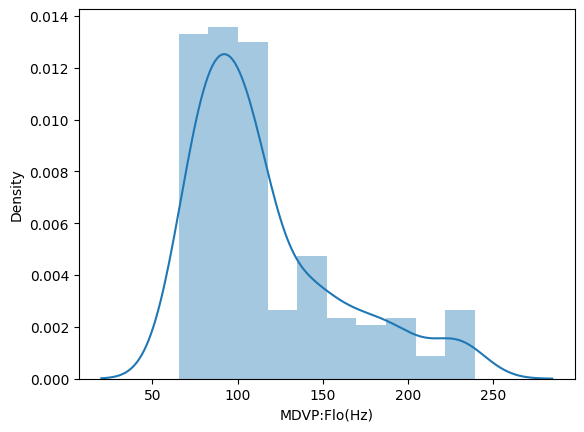

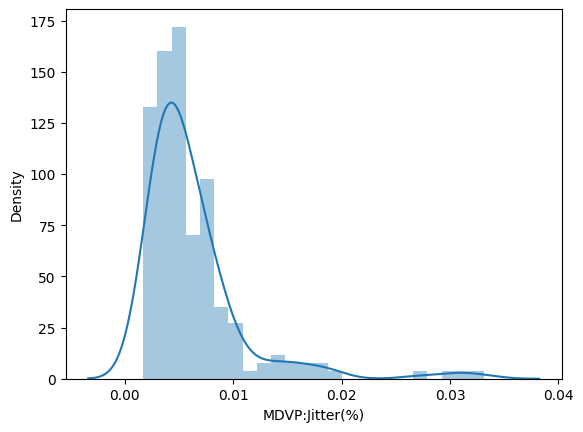

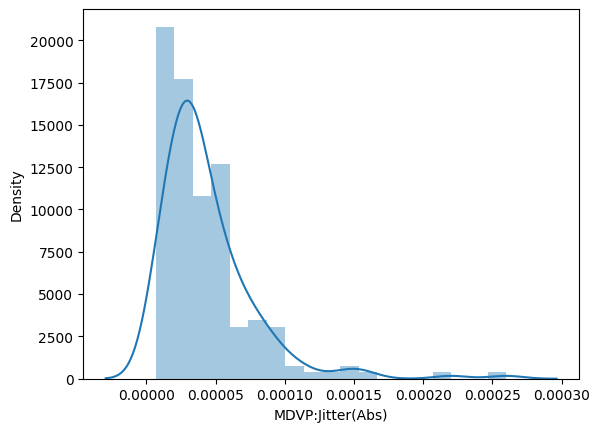

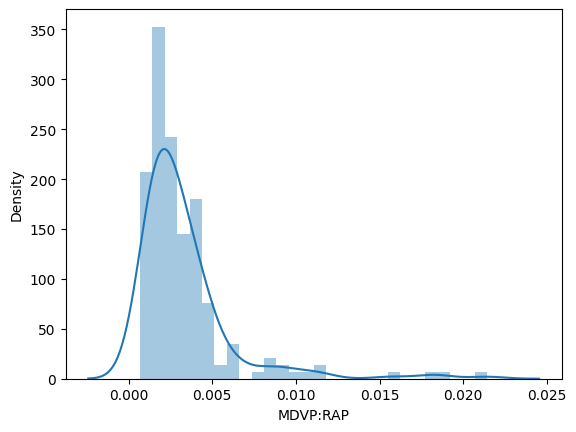

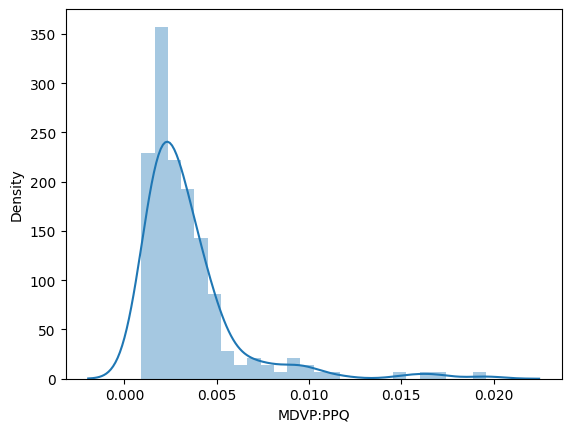

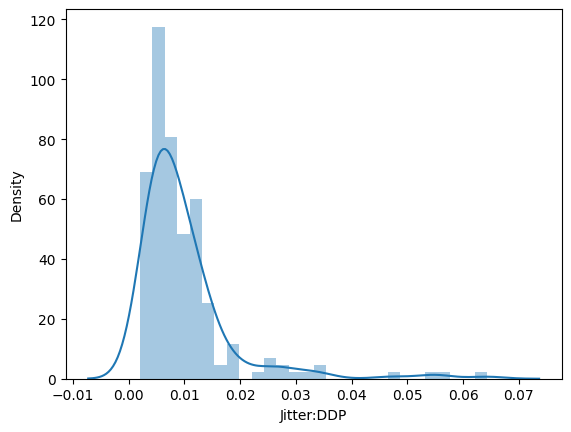

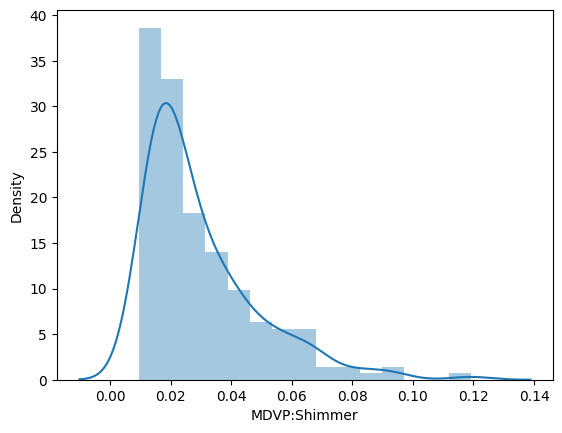

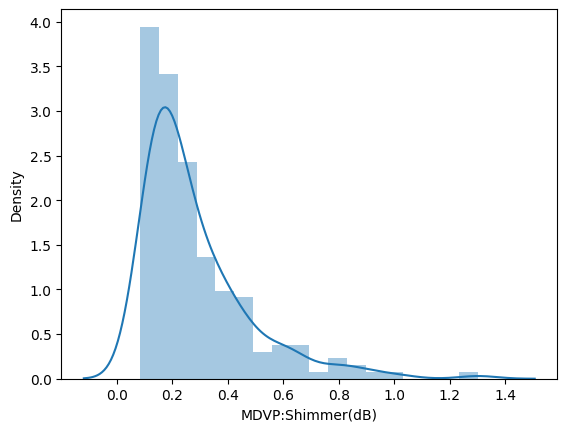

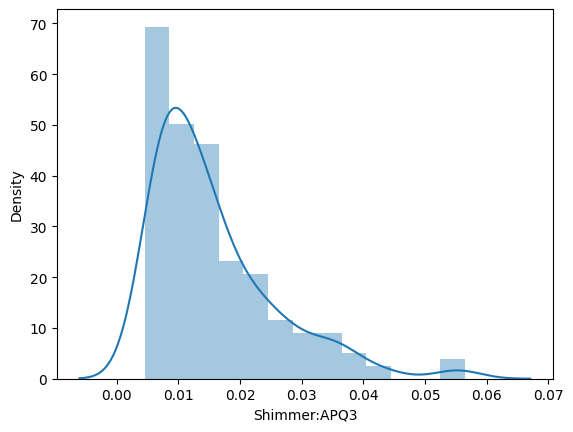

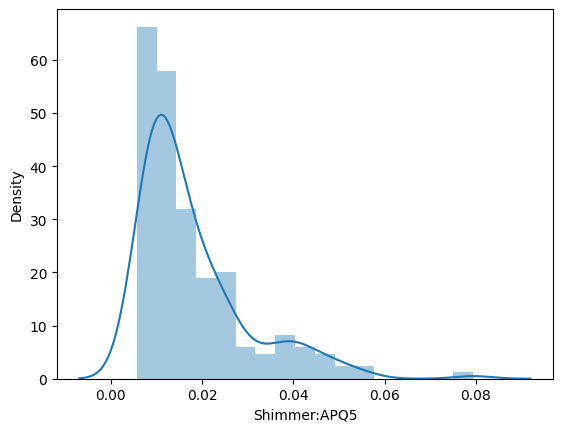

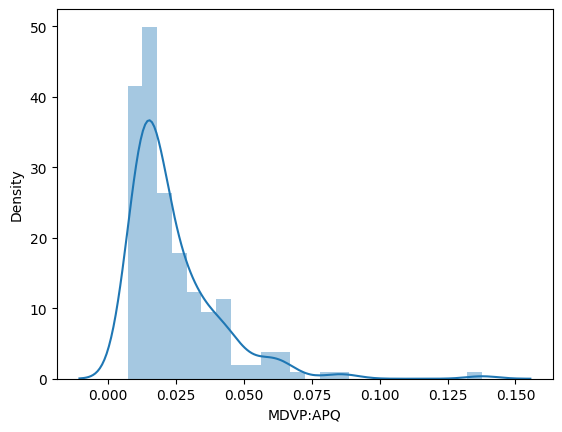

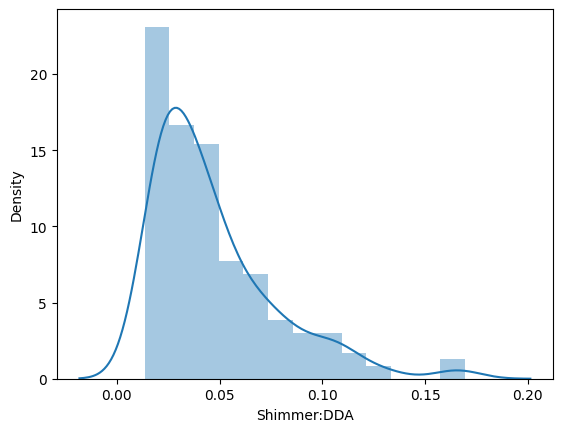

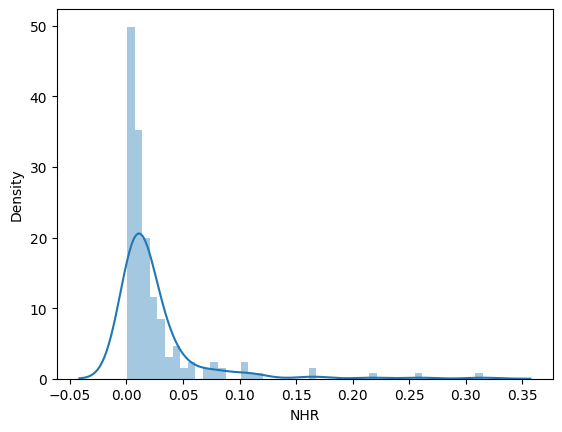

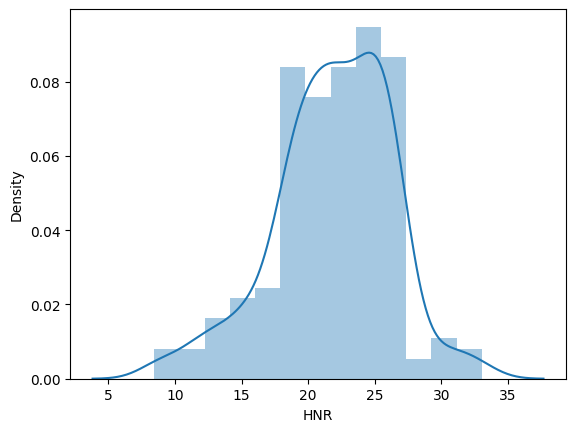

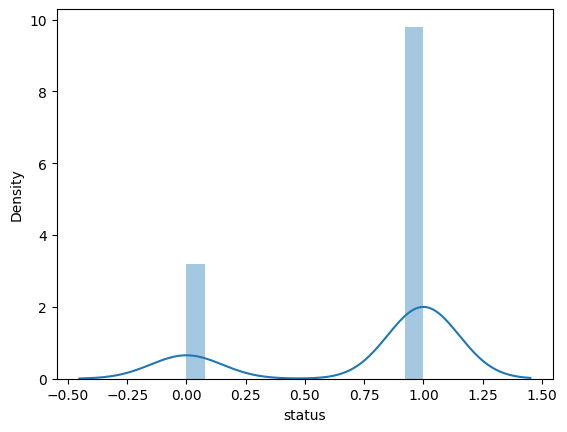

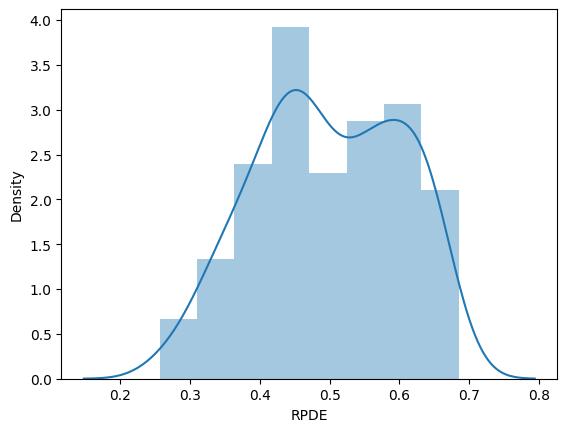

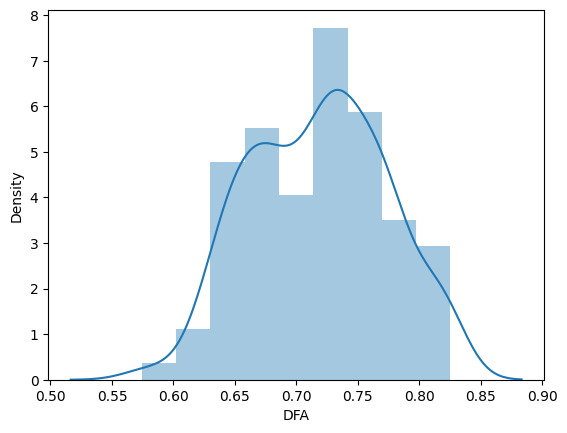

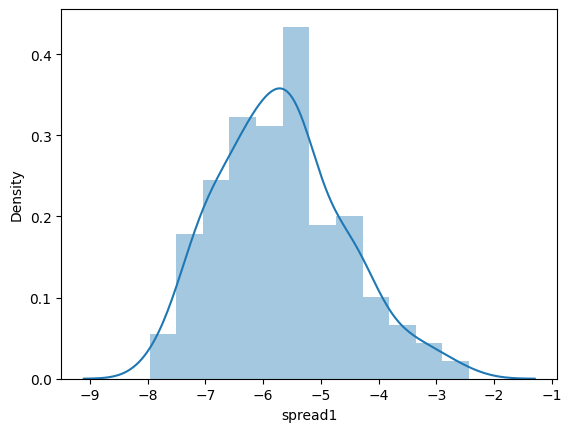

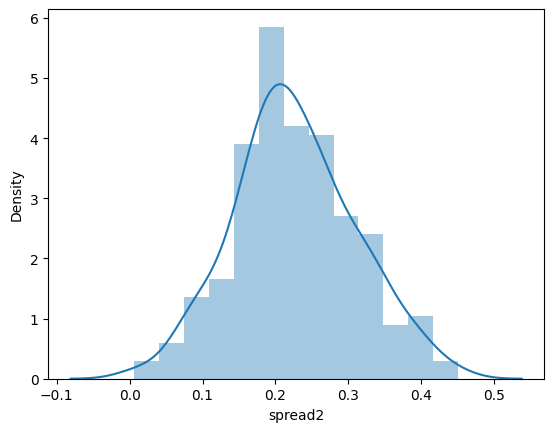

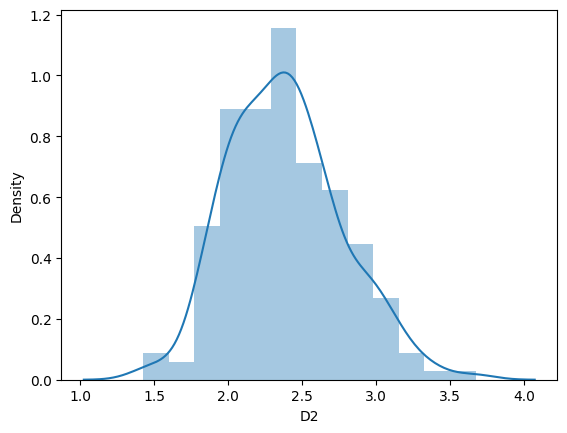

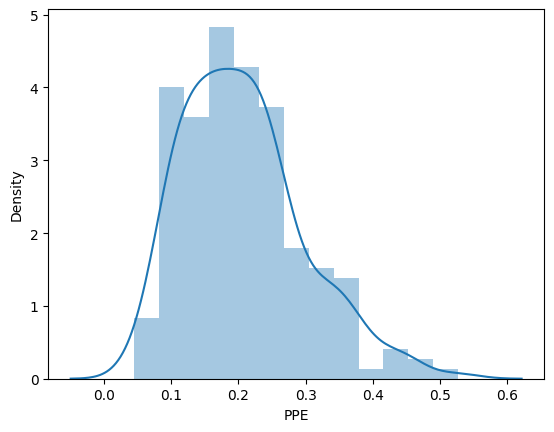

In [11]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()
for i in list(df.columns)[1:]:
    distplots(i)

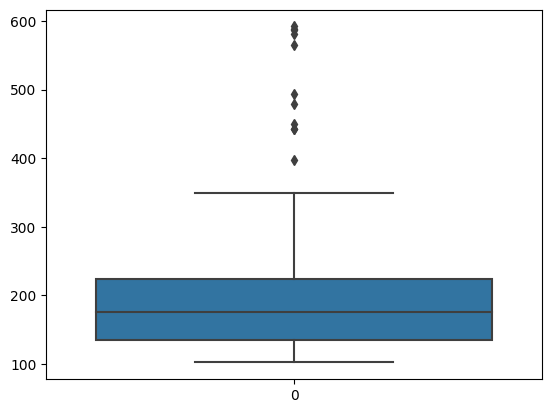

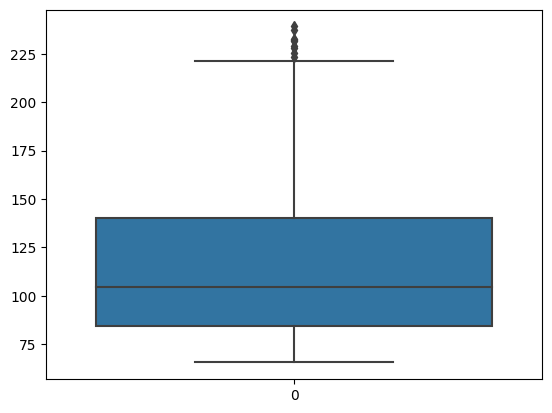

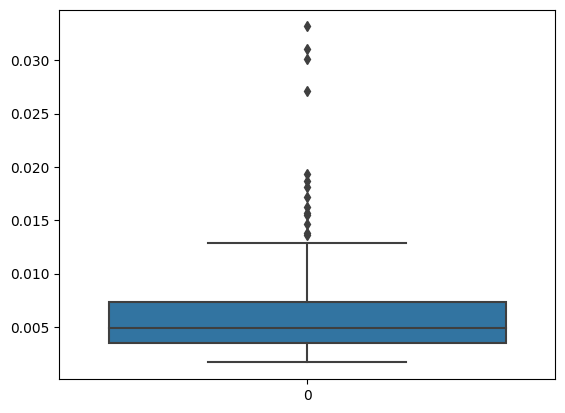

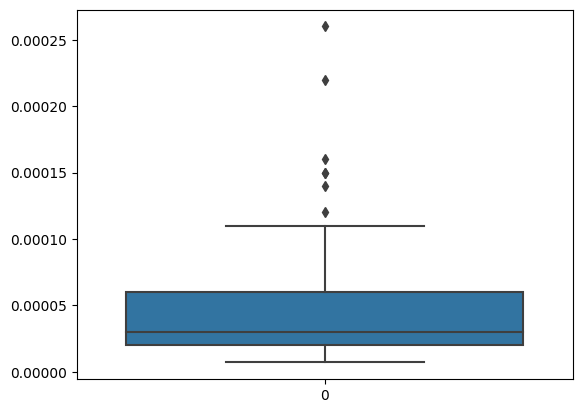

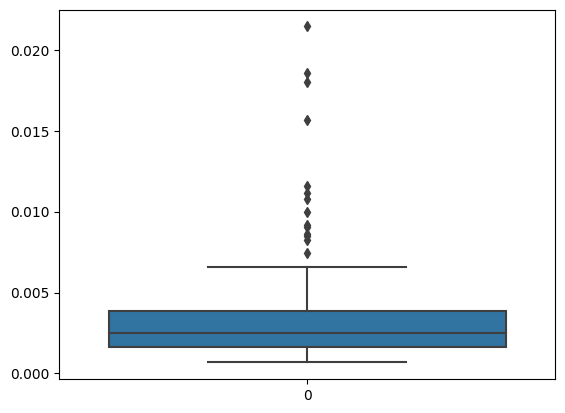

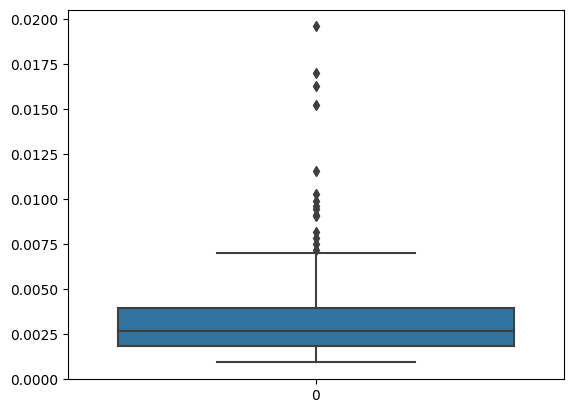

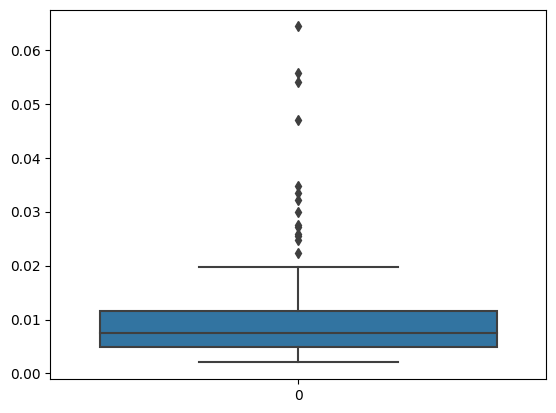

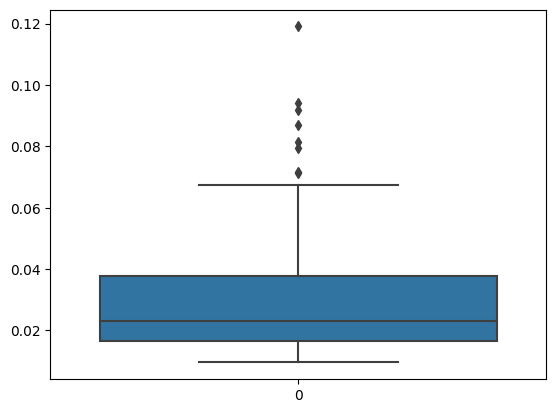

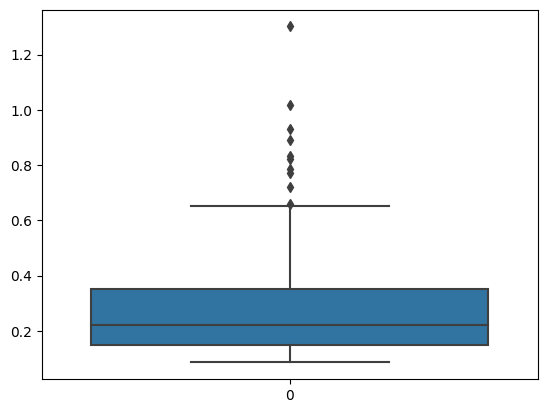

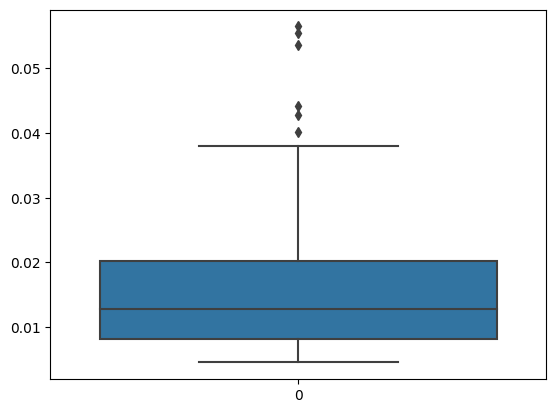

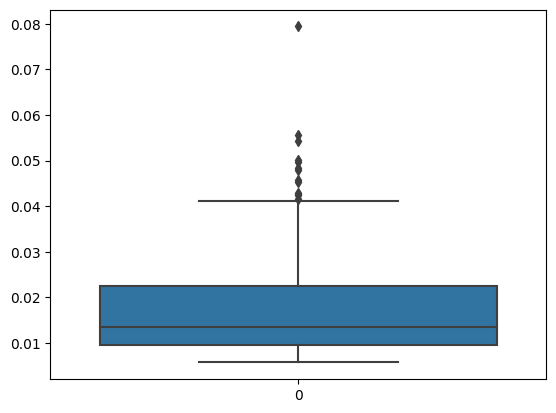

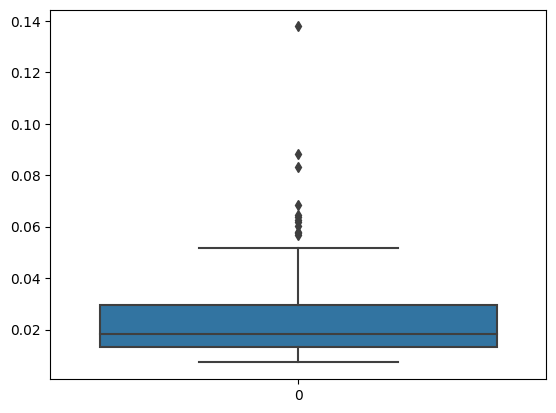

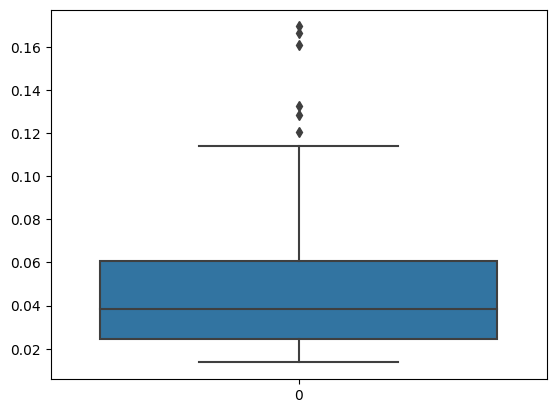

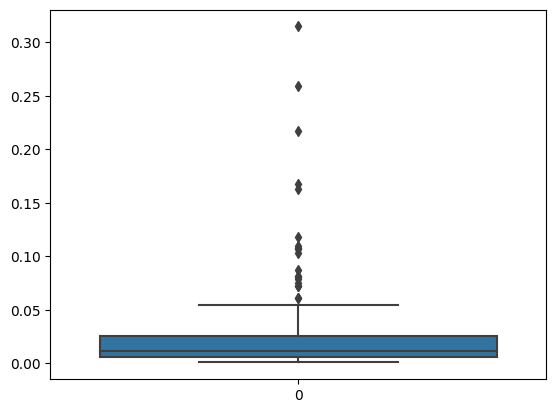

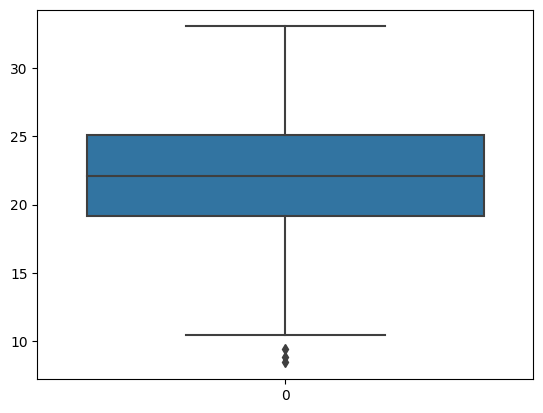

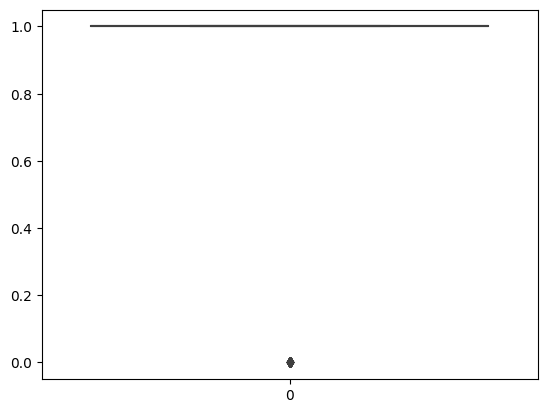

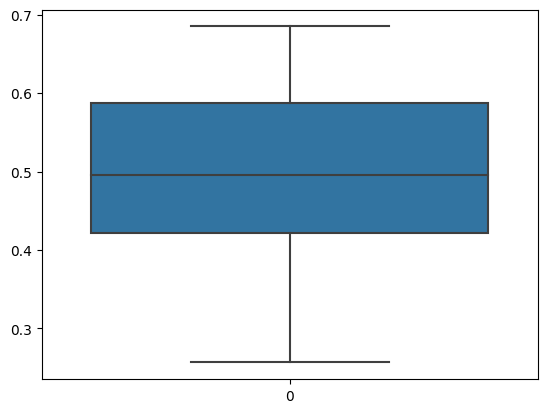

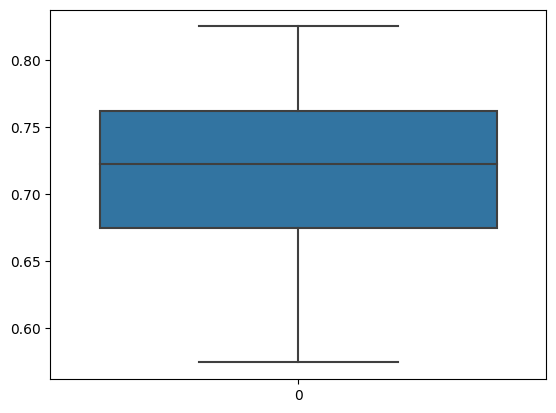

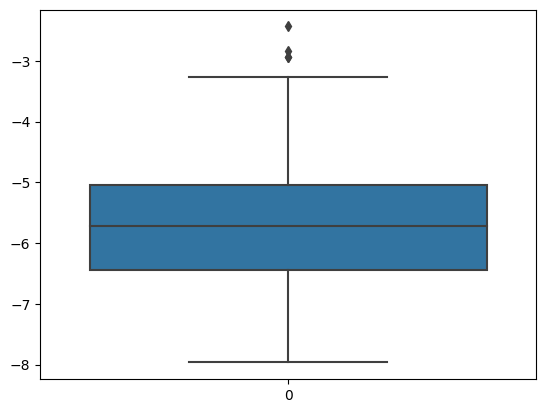

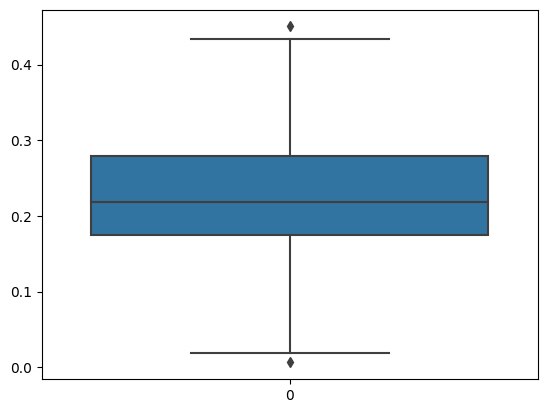

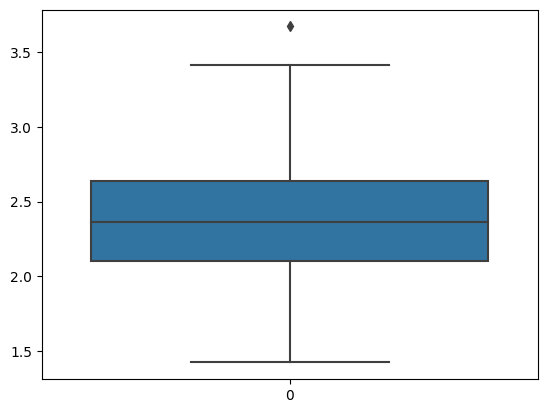

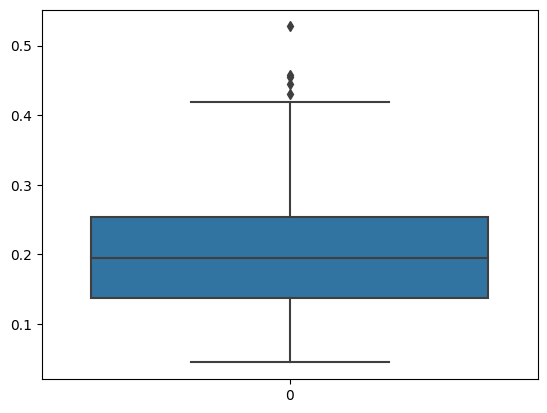

In [12]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
for i in list(df.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplots(i)

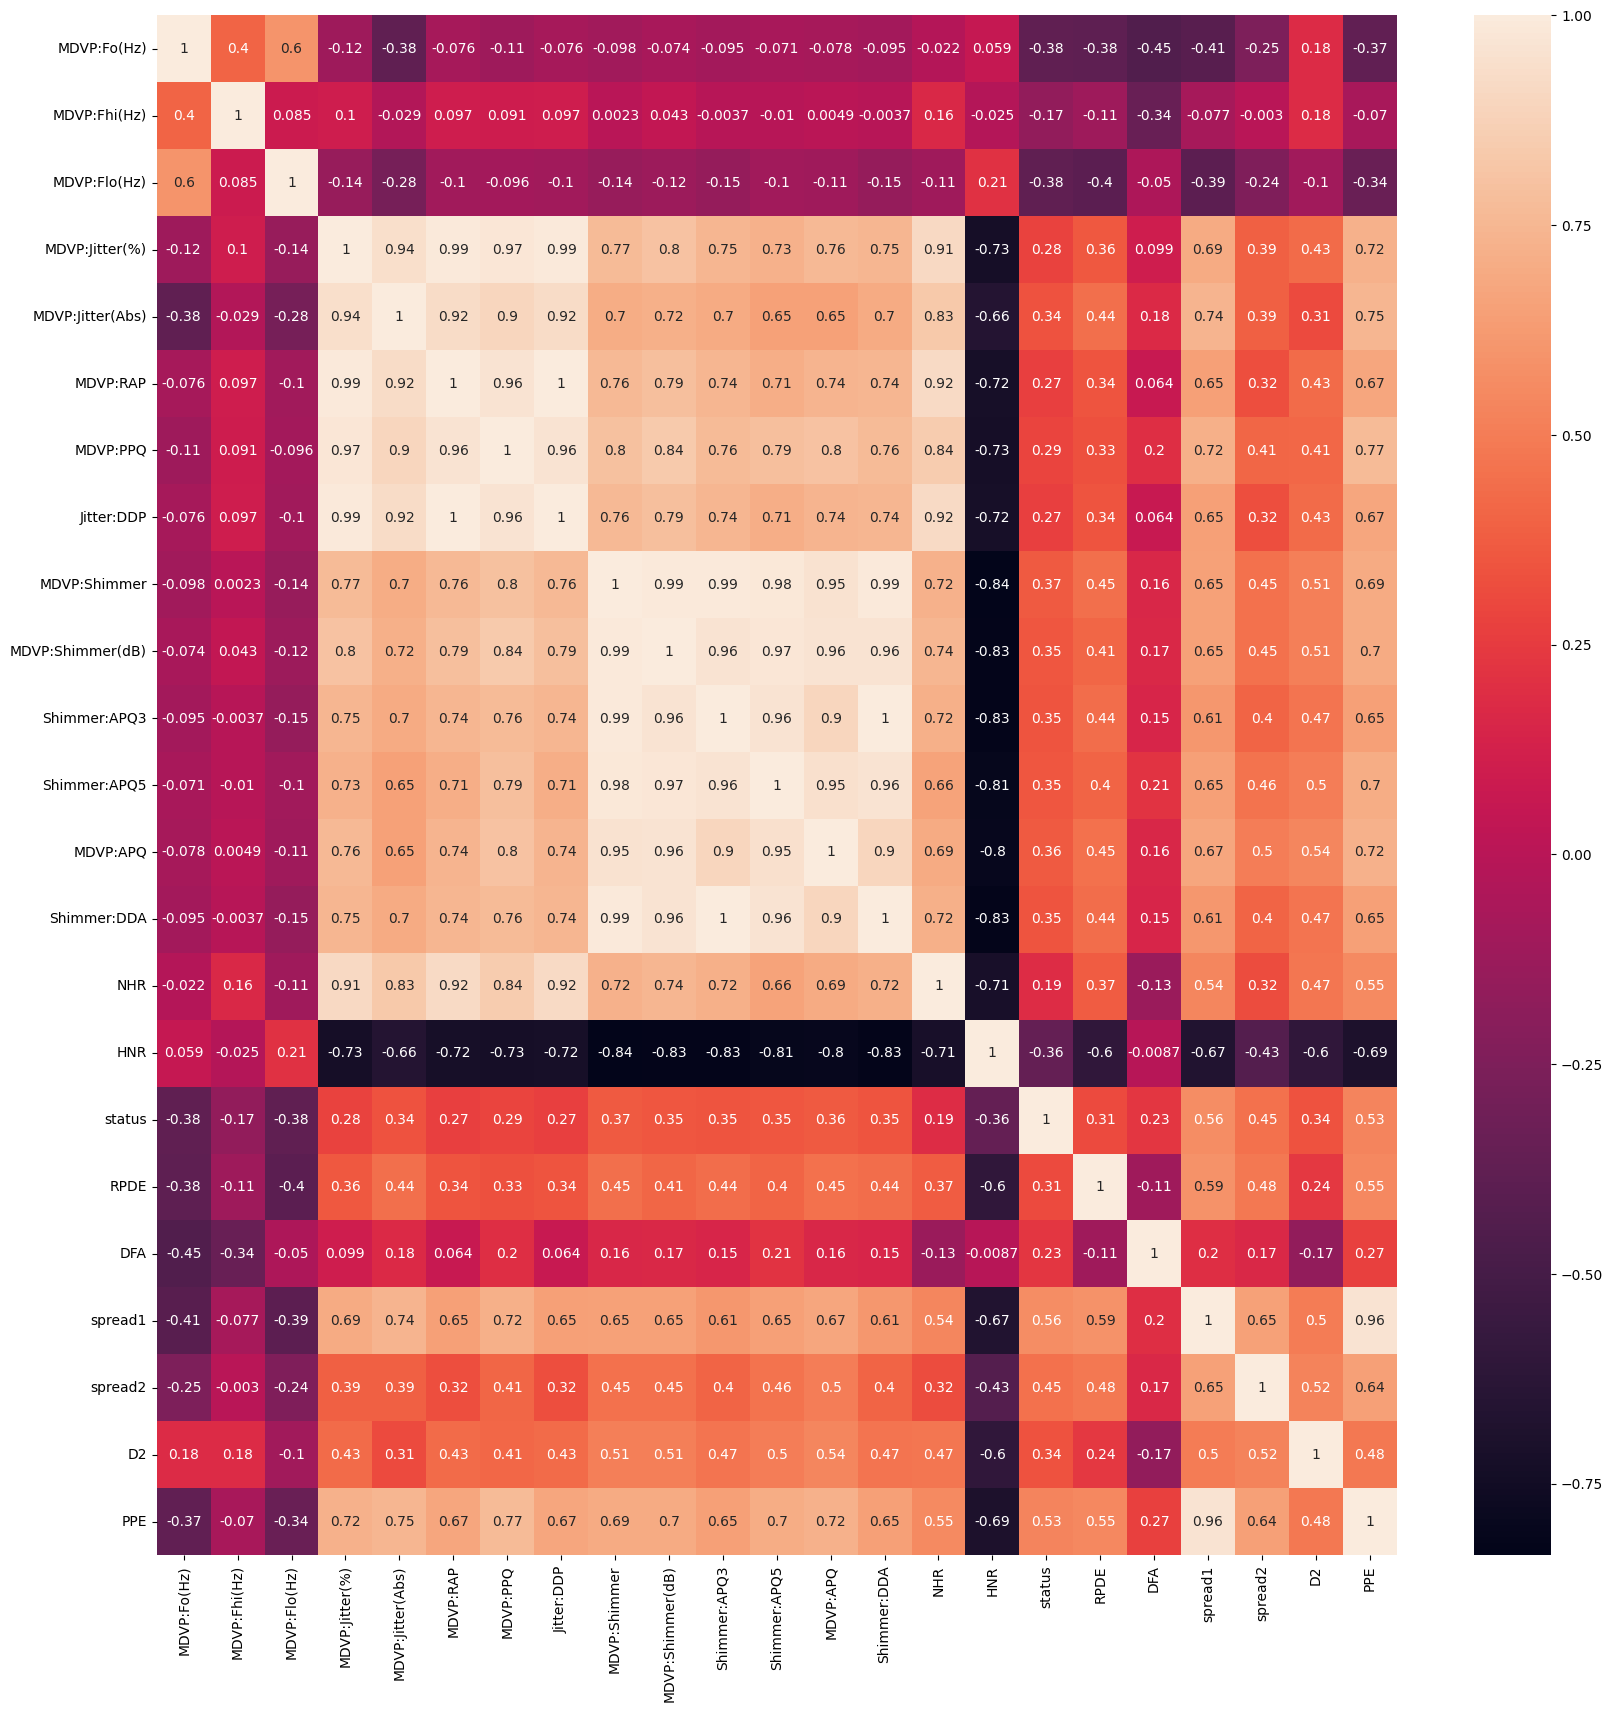

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded your DataFrame 'df' already

# Ensure df contains only numeric data
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plotting correlation heatmap
plt.figure(figsize=(20, 20))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True)
plt.show()


In [15]:
x=df.drop(["status","name"],axis=1)
y=df["status"]

In [16]:
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print(Counter(y))


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/258.0 kB ? eta -:--:--
     ------                                  41.0/258.0 kB 2.0 MB/s eta 0:00:01
     -------------                           92.2/258.0 kB 1.1 MB/s eta 0:00:01
     ------------------                     122.9/258.0 kB 1.0 MB/s eta 0:00:01
     ------------------------             174.1/258.0 kB 952.6 kB/s eta 0:00:01
     -------------------------------      225.3/258.0 kB 986.4 kB/s eta 0:00:01
     ------------------------------------ 258.0/258.0 kB 934.9 kB/s eta 0:00:00
Counter({1: 147, 0: 48})


In [17]:
ros = RandomOverSampler()

x_ros, y_ros = ros.fit_resample(x,y)
print(Counter(y_ros))

Counter({1: 147, 0: 147})


In [18]:
scaler= MinMaxScaler((-1,1))
x=scaler.fit_transform(x_ros)
y=y_ros

In [19]:
from sklearn.decomposition import PCA

pca=PCA(.95)
X_PCA=pca.fit_transform(x)

print(x.shape)
print(X_PCA.shape)

(294, 22)
(294, 8)


In [20]:
x_train,x_test, y_train,y_test=train_test_split(X_PCA, y, test_size=0.2, random_state=7)


                      Method Used  Accuracy
0             Logistic Regression  0.779661
1                   Decision Tree  0.983051
2  Random Forst(Information Gain)  1.000000
3          Random Forest(Entropy)  1.000000
4                             SVM  0.949153
5                             KNN  1.000000
6                             gnb  0.830508
7               Voting Classifier  1.000000
Axes(0.125,0.11;0.775x0.77)


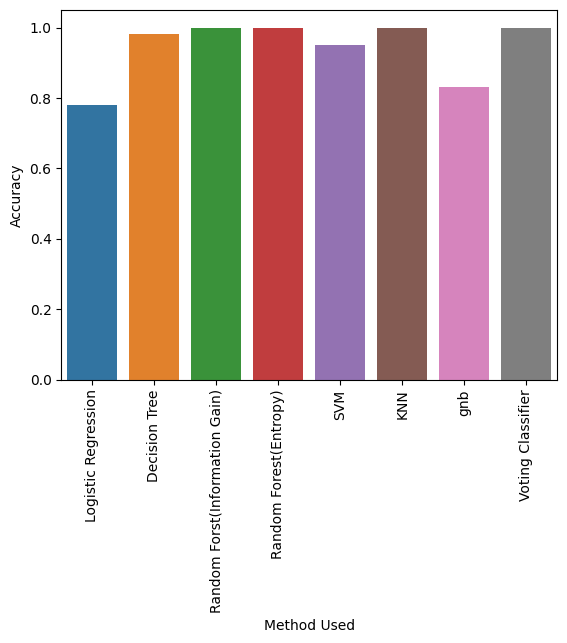

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score, recall_score
list_met=[]
list_accuracy=[]

from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
lr=classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
accuracy_LR= accuracy_score(y_test, y_pred)

from sklearn.tree import DecisionTreeClassifier
classifier2= DecisionTreeClassifier(random_state=14)
dt=classifier2.fit(x_train,y_train)
y_pred2= classifier2.predict(x_test)
accuracy_DT= accuracy_score(y_test,y_pred2)

from sklearn.ensemble import RandomForestClassifier
classifier3= RandomForestClassifier(random_state=14)
rfi=classifier3.fit(x_train,y_train)
y_pred3= classifier3.predict(x_test)
accuracy_RFI= accuracy_score(y_test,y_pred3)

from sklearn.ensemble import RandomForestClassifier
classifier4= RandomForestClassifier(criterion='entropy')
rfe=classifier4.fit(x_train,y_train)
y_pred4= classifier4.predict(x_test)
accuracy_RFE= accuracy_score(y_test,y_pred4)

from sklearn.svm import SVC
model_svm= SVC(cache_size=100)
svm=model_svm.fit(x_train,y_train)
y_pred5= model_svm.predict(x_test)
accuracy_svc= accuracy_score(y_test,y_pred5)

from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb=gnb.fit(x_train,y_train)
y_pred6= gnb.predict(x_test)
accuracy_gnb= accuracy_score(y_test,y_pred6)


from sklearn.neighbors import KNeighborsClassifier
model_knn3= KNeighborsClassifier(n_neighbors=5)
knn=model_knn3.fit(x_train,y_train)
y_pred7= model_knn3.predict(x_test)
accuracy_knn= accuracy_score(y_test,y_pred7)

from sklearn.ensemble import VotingClassifier
evc= VotingClassifier(estimators=[('lr',lr),('rfi',rfi),('rfe',rfe),('DT',dt),('svm',svm),
                                  ('knn',knn),('gnb',gnb)],voting='hard', flatten_transform=True)
model_evc=evc.fit(x_train, y_train)
pred_evc=evc.predict(x_test)
accuracy_evc= accuracy_score(y_test, pred_evc)

list1=['Logistic Regression','Decision Tree','Random Forst(Information Gain)','Random Forest(Entropy)','SVM','KNN','gnb','Voting Classifier']
list2=[accuracy_LR,accuracy_DT, accuracy_RFI, accuracy_RFE, accuracy_svc, accuracy_knn, accuracy_gnb, accuracy_evc]
list3=[classifier, classifier2, classifier3, classifier4,model_svm,model_knn3,gnb,model_evc]

df_Accuracy=pd.DataFrame({'Method Used':list1, 'Accuracy':list2})
print(df_Accuracy)

chart=sns.barplot(x='Method Used', y='Accuracy',data=df_Accuracy)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
print(chart)

In [22]:
model_xg=XGBClassifier()
model_xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
y_pred=model_xg.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

100.0


In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, model_xg.predict(x_test))

In [25]:
from sklearn.metrics import f1_score
f1_score(y_test, model_xg.predict(x_test), average='binary')

1.0

In [26]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
print(classification_report(y_test, model_xg.predict(x_test)))
print('Confusion Matrix: ')
print(cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        35

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Confusion Matrix: 
[[24  0]
 [ 0 35]]


In [27]:
for i in list3:
  print("**********",i,"*********")
  print(classification_report(y_test, i.predict(x_test)))
  print('Confusion Matrix: ')
  print(confusion_matrix(y_test, i.predict(x_test)))
  print()

********** LogisticRegression(C=0.4, max_iter=1000, solver='liblinear') *********
              precision    recall  f1-score   support

           0       0.72      0.75      0.73        24
           1       0.82      0.80      0.81        35

    accuracy                           0.78        59
   macro avg       0.77      0.78      0.77        59
weighted avg       0.78      0.78      0.78        59

Confusion Matrix: 
[[18  6]
 [ 7 28]]

********** DecisionTreeClassifier(random_state=14) *********
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.97      0.99        35

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59

Confusion Matrix: 
[[24  0]
 [ 1 34]]

********** RandomForestClassifier(random_state=14) *********
              precision    recall  f1-score   support

         

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [29]:
parkinsons_data = pd.read_csv('Parkinsson disease.csv')

In [30]:
parkinsons_data['status'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [32]:
# Assuming 'parkinsons_data' is your DataFrame
# First, convert object-type columns to numeric if possible
parkinsons_data = parkinsons_data.apply(pd.to_numeric, errors='coerce')

# Then, select only numeric columns for groupby and mean calculation
numeric_columns = parkinsons_data.select_dtypes(include=['float64', 'int64']).columns

# Perform groupby and mean calculation on numeric columns
mean_values = parkinsons_data.groupby('status')[numeric_columns].mean()


In [33]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [34]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [35]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)


(195, 22) (156, 22) (39, 22)


In [38]:
scaler = StandardScaler()

In [39]:
scaler.fit(X_train)

StandardScaler()

In [40]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)
print(X_train)


[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


In [41]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [42]:
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
X_train_prediction = model.predict(X_train)


In [44]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease
